In [1]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
import os
import requests

In [4]:
import env

credentials loaded successfully


In [5]:
import pyEX as p

In [6]:
c = p.Client(api_token = env.token, version = 'stable')

In [7]:
import iexfinance as iex

In [8]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [9]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [10]:
from iexfinance.stocks import get_historical_data

In [11]:
now = datetime.date.today()
now

datetime.date(2021, 2, 1)

In [12]:
start = datetime.datetime(2017, 1, 1)
end = now

In [13]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

In [14]:
spy

,open,high,low,close,volume
date,,,,,
2017-01-03,225.42,234.0000,229.6562,229.91,94824608
2017-01-04,230.41,229.8800,235.4700,230.12,79315351
2017-01-05,237.13,228.5300,227.3300,235.60,81026955
2017-01-06,231.00,236.5800,227.8000,232.09,72723913
2017-01-09,230.23,234.0751,231.4658,227.41,47634841
...,...,...,...,...,...
2021-01-25,395.24,390.7400,384.9600,386.43,70785126
2021-01-26,385.87,394.8000,395.2100,390.92,43858482
2021-01-27,384.74,385.5700,377.3900,389.21,123760489


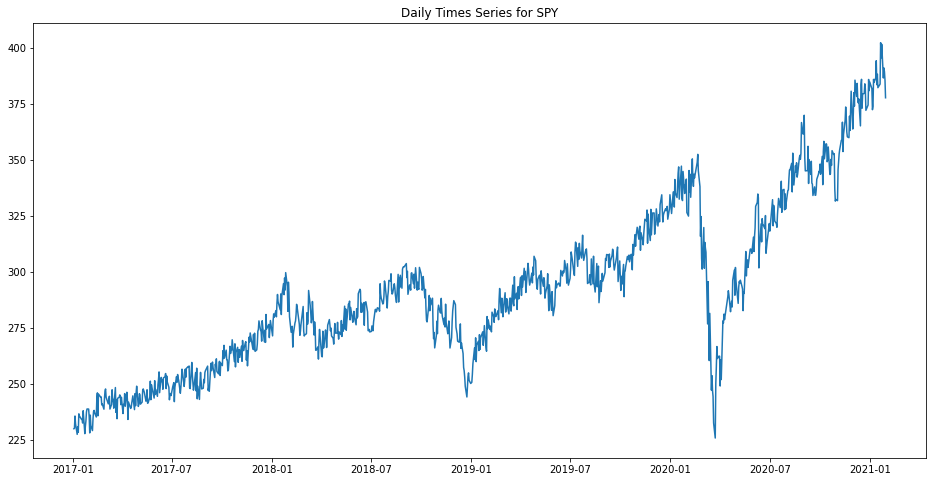

In [15]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")
plt.show()

In [16]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [17]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,44.7490,44.125,43.2030,45.229,30726181
2017-01-04,43.4600,47.100,42.8720,46.050,58087836
2017-01-05,46.6830,47.103,45.9500,45.830,30798149
2017-01-06,46.6770,47.526,45.8100,47.512,28367737
2017-01-09,47.3070,48.031,46.0000,47.303,20276557
...,...,...,...,...,...
2021-01-25,883.0000,908.900,868.8612,904.600,42486032
2021-01-26,897.9000,923.000,908.6000,915.150,23315267
2021-01-27,883.8100,893.400,861.4500,880.140,28511999


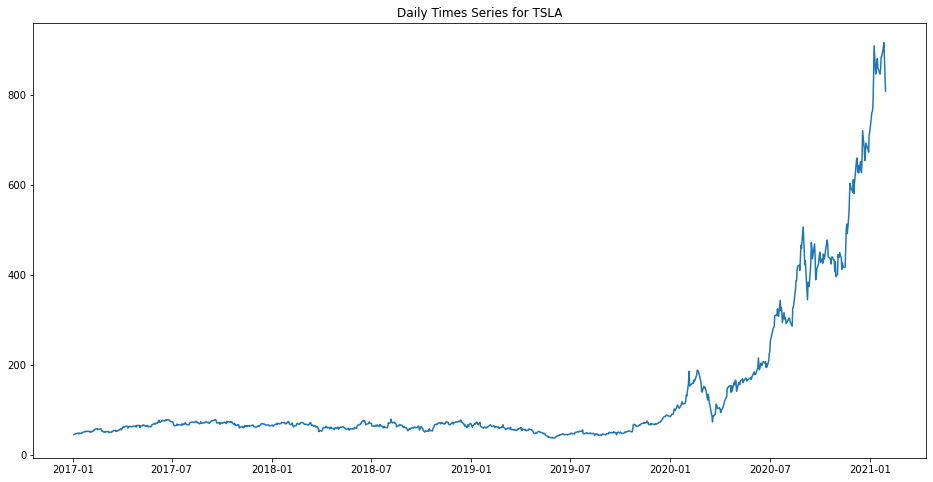

In [18]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")
plt.show()

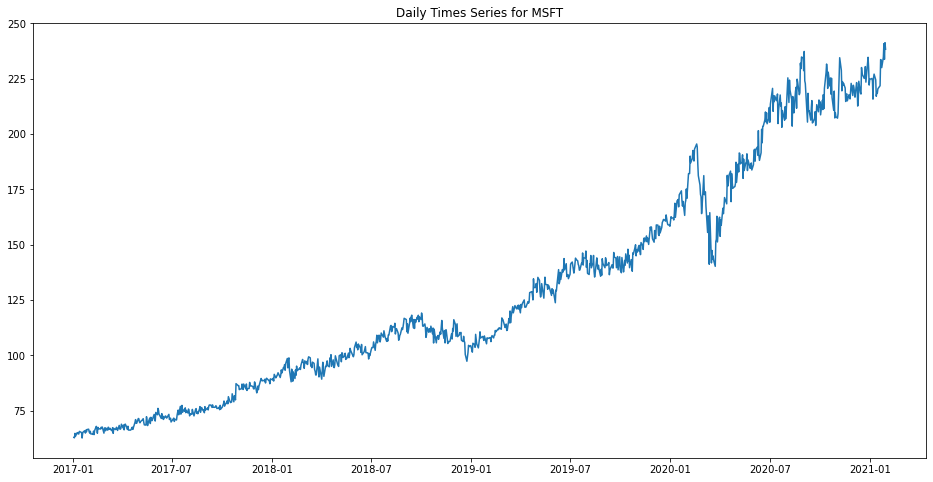

In [19]:
# Creating a function for this process:

msft = get_historical_data("MSFT", start, end, output_format = 'pandas')

plt.figure(figsize = (16, 8))
plt.plot(msft.index, msft['close'])
plt.title("Daily Times Series for MSFT")
plt.show()

In [20]:
def get_stock_chart(ticker, start_date, end_date, output_format = 'pandas'):
    
    '''This function will take the inputs from the user as to ticker, start date, end date, and default output format
    and return a chart with the requested stock/ticker.'''
    
    ticker = get_historical_data(str(ticker), start_date, end_date, output_format = 'pandas')
    plt.figure(figsize = (16, 8))
    plt.plot(ticker.index, ticker['close'])
    plt.title(f"Daily Times Series for {ticker}")
    plt.show()
    

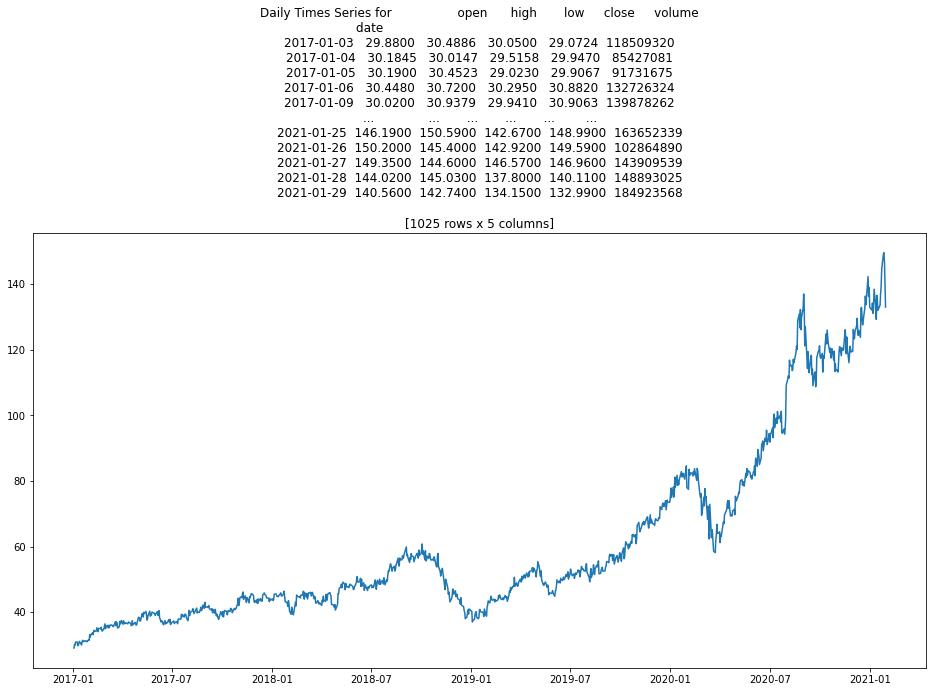

In [21]:
get_stock_chart("AAPL", start, end)

In [22]:
# Now adding user inputs:

In [23]:
# starting = datetime(input())

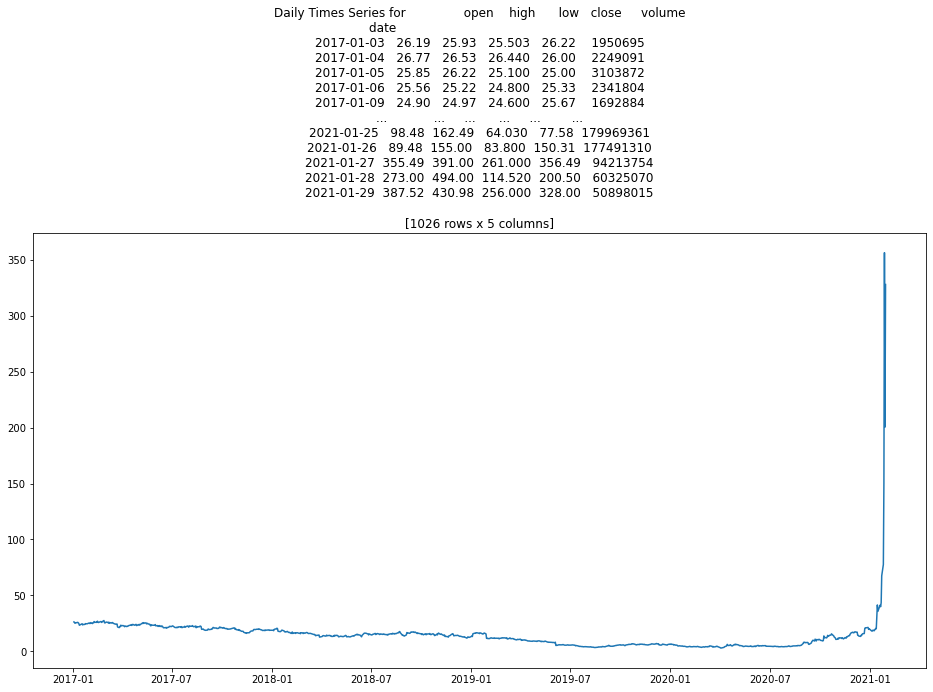

In [24]:
get_stock_chart("GME", start, end)

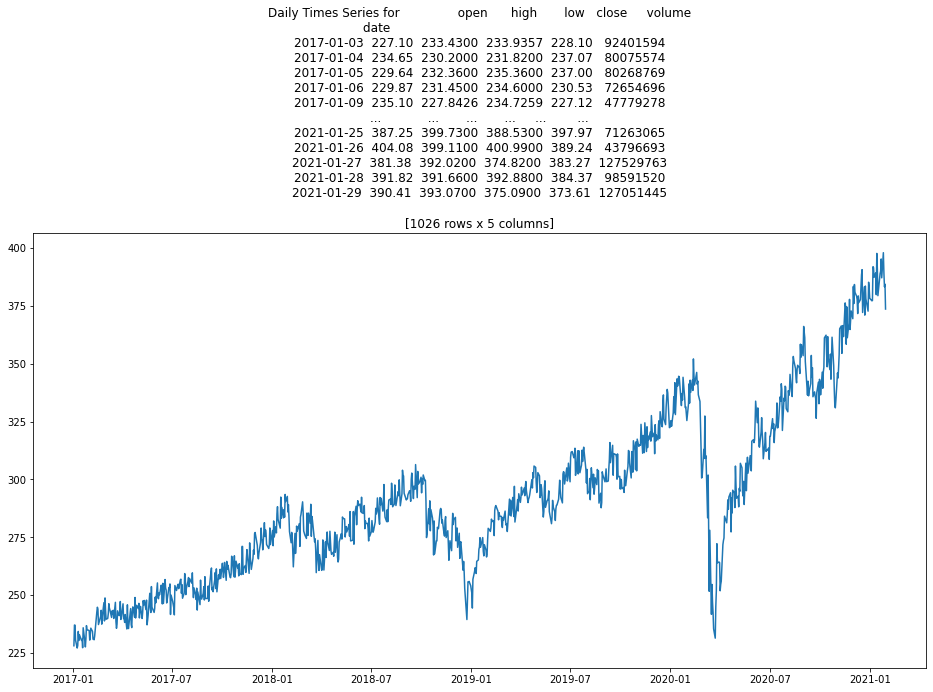

In [25]:
get_stock_chart("SPY", start, end)

-----------------

In [26]:
# Status update

In [27]:
import requests

In [28]:
import env

In [29]:
r = requests.get(f"https://api.orats.io/datav2/cores?token={env.orats_token}&ticker=AAPL")
r.json()

{'data': [{'ticker': 'AAPL',
   'tradeDate': '2021-02-01',
   'assetType': 3,
   'priorCls': 131.96,
   'pxAtmIv': 134.38,
   'mktCap': 2260710,
   'cVolu': 947416,
   'cOi': 5249864,
   'pVolu': 381324,
   'pOi': 3244137,
   'orFcst20d': 41.413,
   'orIvFcst20d': 50.546,
   'orFcstInf': 34.27,
   'orIvXern20d': 39.13,
   'orIvXernInf': 39.87,
   'iv200Ma': 35.82,
   'atmIvM1': 38.002,
   'atmFitIvM1': 38.803,
   'atmFcstIvM1': 41.413,
   'dtExM1': 19,
   'atmIvM2': 39.459,
   'atmFitIvM2': 39.053,
   'atmFcstIvM2': 39.783,
   'dtExM2': 47,
   'atmIvM3': 39.301,
   'atmFitIvM3': 39.248,
   'atmFcstIvM3': 38.634,
   'dtExM3': 75,
   'atmIvM4': 39.881,
   'atmFitIvM4': 39.469,
   'atmFcstIvM4': 37.947,
   'dtExM4': 138,
   'iRate5wk': 0.08,
   'iRateLt': 0.12,
   'px1kGam': 6869.12,
   'volOfVol': 0.0716,
   'volOfIvol': 0.0445,
   'slope': 0.201231,
   'slopeInf': 0.33282,
   'slopeFcst': -0.01978,
   'slopeFcstInf': 0.63836,
   'deriv': 0.099,
   'derivInf': 0.0772,
   'derivFcst': 0.0

In [30]:
from pandas.tseries.offsets import BDay

In [31]:
today_date = datetime.datetime.today()
print(today_date)

2021-02-01 14:56:50.893952


In [32]:
yesterday_date = (today_date - BDay(1))

In [33]:
from polygon import RESTClient


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("AAPL", "2021-01-25")
        print(f"On: {resp.from_} Apple opened at {resp.open} and closed at {resp.close}")


if __name__ == '__main__':
    main()

On: 2021-01-25 Apple opened at 143.07 and closed at 142.92


In [ ]:
import datetime

from polygon import RESTClient


def ts_to_datetime(ts) -> str:
    return datetime.datetime.fromtimestamp(ts / 1000.0).strftime('%Y-%m-%d %H:%M')


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        from_ = "2019-01-01"
        to = "2019-02-01"
        resp = client.stocks_equities_aggregates("AAPL", 1, "minute", from_, to, unadjusted=False)

        print(f"Minute aggregates for {resp.ticker} between {from_} and {to}.")

        for result in resp.results:
            dt = ts_to_datetime(result["t"])
            print(f"{dt}\n\tO: {result['o']}\n\tH: {result['h']}\n\tL: {result['l']}\n\tC: {result['c']} ")


if __name__ == '__main__':
    main()